In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Big_Mart_Sales_Figure.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


**Seperate numerical and non-numerical data**

In [ ]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
df_non_num = df.select_dtypes(exclude='number')
df_non_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df_non_num.nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
#Create a function that can return 'low fat' if it is ['Low Fat', 'low fat', 'LF'] else return 'regular'

def fix_item_fat_content(fat_type):
  if fat_type in ['Low Fat', 'low fat', 'LF']:
    return 'low fat'
  else:
    return 'regular'

In [ ]:
fix_item_fat_content('LF')

'low fat'

In [ ]:
fix_item_fat_content('reg')

'regular'

* apply() - used to apply a user defined function on a given data column

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(fix_item_fat_content)

In [ ]:
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [ ]:
df_non_num = df.select_dtypes(exclude='number')
df_non_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df_non_num.nunique()

,0
Item_Identifier,1559
Item_Fat_Content,2
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [ ]:
df_non_num['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df_non_num['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
df_non_num['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
text = 'OUT049'
int(text[-2:])

49

In [ ]:
def fix_out_ide(identifier):
  return int(identifier[-2:])

In [ ]:
fix_out_ide('dhjkgffh76')

76

In [ ]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(fix_out_ide)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
df['Item_Identifier'].nunique()

1559

In [ ]:
df.shape

(8523, 12)

In [ ]:
def item_ide(identifier):
  return identifier[:2]

item_ide('FDA15')

'FD'

In [ ]:
lambda x : x[:2]

<function __main__.<lambda>(x)>

In [ ]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [ ]:
#df['Item_Identifier'].apply(lambda x : x[:3]).nunique()

In [ ]:
#df['Item_Identifier'].apply(lambda x : x[-2:]).nunique()

In [ ]:
#df['Item_Identifier'].apply(lambda x : x[:3]).value_counts()

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
age = 2025 - df['Outlet_Establishment_Year']
age

,Outlet_Establishment_Year
0,26
1,16
2,26
3,27
4,38
...,...
8518,38
8519,23
8520,21
8521,16


In [ ]:
df.insert(7,"Outlet_age",age)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,38,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df = df.drop(columns = ['Outlet_Establishment_Year'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,38,High,Tier 3,Supermarket Type1,994.7052


**Handling Missing values**

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_age,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [ ]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


<Axes: ylabel='Frequency'>

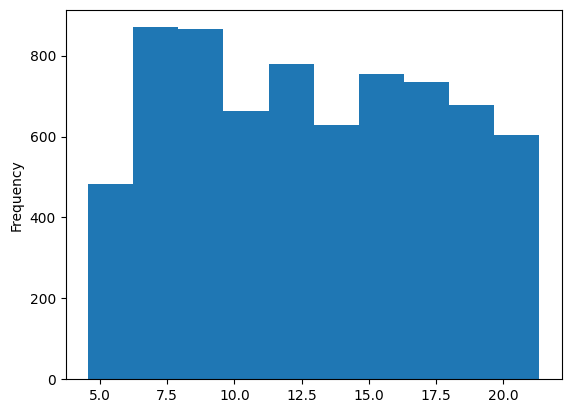

In [ ]:
df['Item_Weight'].plot.hist()

* The weight column is having uniform data distribution
* The mean and median values are very close to each other
* It has not outliers
* Use mean or median to fill the missing values
* fillna() - can be used to fill the missing values

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [ ]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_age,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.shape

(8523, 12)

In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
pd.crosstab( df['Outlet_Location_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
pd.crosstab( df['Outlet_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


* We find relation between Outlet_location_type and outlet_size, We can use this information to fill the missing values in outlet size columns
  * For Tier 1 and Tier 2 cities majority of Outlets 'Small'
  * For Tier 3 cities majority of Outlets 'Medium'

In [ ]:
def fix_outlet_size(outlet_loc_type):
  if outlet_loc_type in ['Tier 1' , 'Tier 2']:
    return 'Small'
  else:
    return 'Medium'

In [ ]:
fix_outlet_size('Tier 3')

'Medium'

In [ ]:
df['Outlet_Location_Type'].apply(fix_outlet_size)

,Outlet_Location_Type
0,Small
1,Medium
2,Small
3,Medium
4,Medium
...,...
8518,Medium
8519,Small
8520,Small
8521,Medium


In [ ]:
#whereever the data is already existing, that row will not get affected but
#if a value is missing it will be filled up with crossponding row value from table of previous execution

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Location_Type'].apply(fix_outlet_size))

In [ ]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,Medium,Tier 3,Grocery Store,732.3800


In [ ]:
#features
X = df.drop(columns = ['Item_Outlet_Sales'])

#Labels
y = df['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,Medium,Tier 3,Grocery Store
4,NC,8.93,low fat,0.000000,Household,53.8614,13,38,High,Tier 3,Supermarket Type1


In [ ]:
Xt = X.copy()

**Convert non-numerical values into numerical forms**

In [ ]:
print(X['Item_Identifier'].unique())
print(X['Item_Fat_Content'].unique())
print(X['Item_Type'].unique())
print(X['Outlet_Size'].unique())
print(X['Outlet_Location_Type'].unique())
print(X['Outlet_Type'].unique())

['FD' 'DR' 'NC']
['low fat' 'regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**Encoding ordinal data**

In [ ]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2


**Label Encoding**

  * Ordinal data

In [ ]:
Xt['Item_Fat_Content'] = X['Item_Fat_Content'].map({'low fat':0, 'regular':1})
Xt['Outlet_Size'] = X['Outlet_Size'].map({'Small' : 0 , 'Medium' : 1, 'High' : 2})
Xt['Outlet_Location_Type'] = X['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2' : 2 , 'Tier 3' : 3 })

In [ ]:
Xt.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,9.30,0,0.016047,Dairy,249.8092,49,26,1,1,Supermarket Type1
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,18,16,1,3,Supermarket Type2
2,FD,17.50,0,0.016760,Meat,141.6180,49,26,1,1,Supermarket Type1
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,10,27,1,3,Grocery Store
4,NC,8.93,0,0.000000,Household,53.8614,13,38,2,3,Supermarket Type1


**One hot encoding for nominal data**

In [ ]:
dt = pd.DataFrame({'cat' : ['A','B','A','C','B','C','C','A','D']})
dt

,cat
0,A
1,B
2,A
3,C
4,B
5,C
6,C
7,A
8,D


In [ ]:
pd.get_dummies(dt,dtype=int)

,cat_A,cat_B,cat_C,cat_D
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,1,0,0,0
8,0,0,0,1


In [ ]:
Xt.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,9.30,0,0.016047,Dairy,249.8092,49,26,1,1,Supermarket Type1
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,18,16,1,3,Supermarket Type2
2,FD,17.50,0,0.016760,Meat,141.6180,49,26,1,1,Supermarket Type1


**One-hot Encoding**

  * Nominal Data

In [ ]:
Xts = pd.get_dummies(Xt , dtype=int)
Xts.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Item_Identifier_DR,Item_Identifier_FD,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,49,26,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,18,16,1,3,1,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,49,26,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,10,27,1,3,0,1,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,13,38,2,3,0,0,...,0,0,0,0,0,0,0,1,0,0


**Min-Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(Xts)

In [ ]:
X_scaled

array([[0.28252456, 0.        , 0.04886645, ..., 1.        , 0.        ,
        0.        ],
       [0.08127419, 1.        , 0.05870508, ..., 0.        , 1.        ,
        0.        ],
       [0.77076511, 0.        , 0.05103696, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35992855, 0.        , 0.10714751, ..., 1.        , 0.        ,
        0.        ],
       [0.15808276, 1.        , 0.44221878, ..., 0.        , 1.        ,
        0.        ],
       [0.61000298, 0.        , 0.13666114, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


<Axes: ylabel='Frequency'>

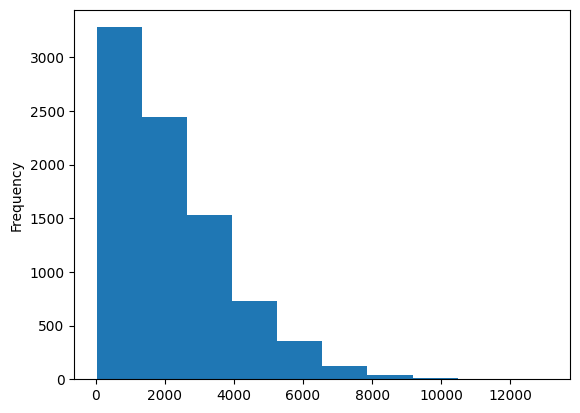

In [ ]:
y.plot.hist()

**Convert skewed data into normally distributed data**

In [ ]:
Ylog = np.log(y)

In [ ]:
Ylog

,Item_Outlet_Sales
0,8.225540
1,6.094524
2,7.648392
3,6.596300
4,6.902446
...,...
8518,7.929625
8519,6.308617
8520,7.084322
8521,7.520558


<Axes: ylabel='Frequency'>

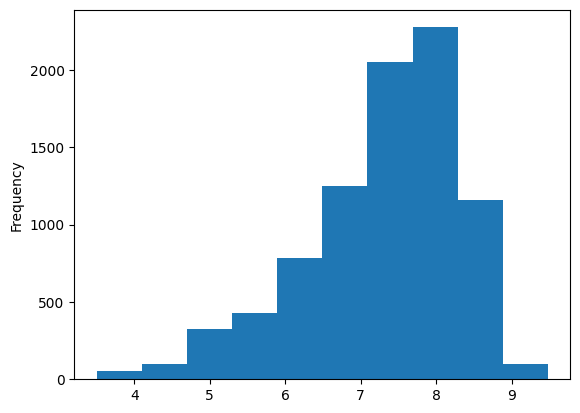

In [ ]:
Ylog.plot.hist()

**train test split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Ylog,train_size=0.75)

**Train the model**

In [ ]:
from sklearn.linear_model import LinearRegression

model_A = LinearRegression()

model_A.fit(xtrain,ytrain)

LinearRegression()

**Evaluate model performance**

In [ ]:
ytrainPred = model_A.predict(xtrain)        #Make predictions on training data
ytestPred = model_A.predict(xtest)           #Make predictions on test data

In [ ]:
maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

In [ ]:
print("Mean absolute error on training data" , maeTrain)
print()
print("Mean absolute error on test data" , maeTest)

Mean absolute error on training data 0.41771644825271825

Mean absolute error on test data 0.41141391922511505


In [ ]:
from sklearn.metrics import r2_score

print("R2Score for training data", r2_score(ytrain, ytrainPred))
print()
print("R2Score for test data", r2_score(ytest, ytestPred))

R2Score for training data 0.7160975994760325

R2Score for test data 0.7346265483084092


In [ ]:
n1 = ((ytest - ytestPred)**2).sum()
d1 = ((ytest - ytest.mean())**2).sum()

r2 = 1 - (n1/d1)
print(r2)

0.7346265483084092


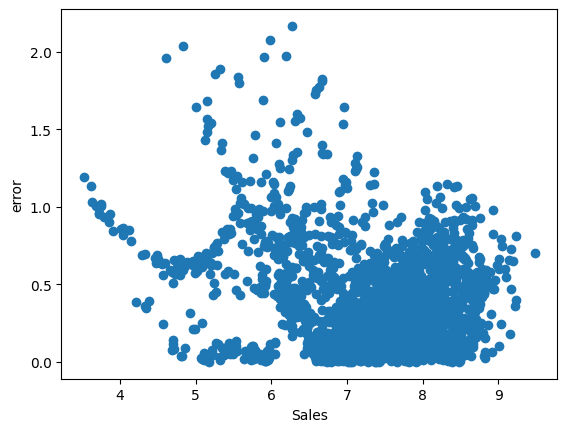

In [ ]:
test_error = abs(ytest - ytestPred)
test_sales = ytest

plt.scatter(test_sales , test_error)
plt.xlabel('Sales')
plt.ylabel("error")
plt.show()

In [ ]:
Xts.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_age', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Identifier_DR', 'Item_Identifier_FD',
       'Item_Identifier_NC', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [ ]:
model_A.intercept_

np.float64(6.348334797549068)

In [ ]:
feature_coef = pd.DataFrame(model_A.coef_.reshape(-1,1))
feature_coef.index = Xts.columns
feature_coef

,0
Item_Weight,-0.010168
Item_Fat_Content,0.020769
Item_Visibility,-0.035048
Item_MRP,1.952207
Outlet_Identifier,-0.078745
Outlet_age,-0.097435
Outlet_Size,0.057885
Outlet_Location_Type,-0.111772
Item_Identifier_DR,0.017050
Item_Identifier_FD,-0.012151


<Axes: >

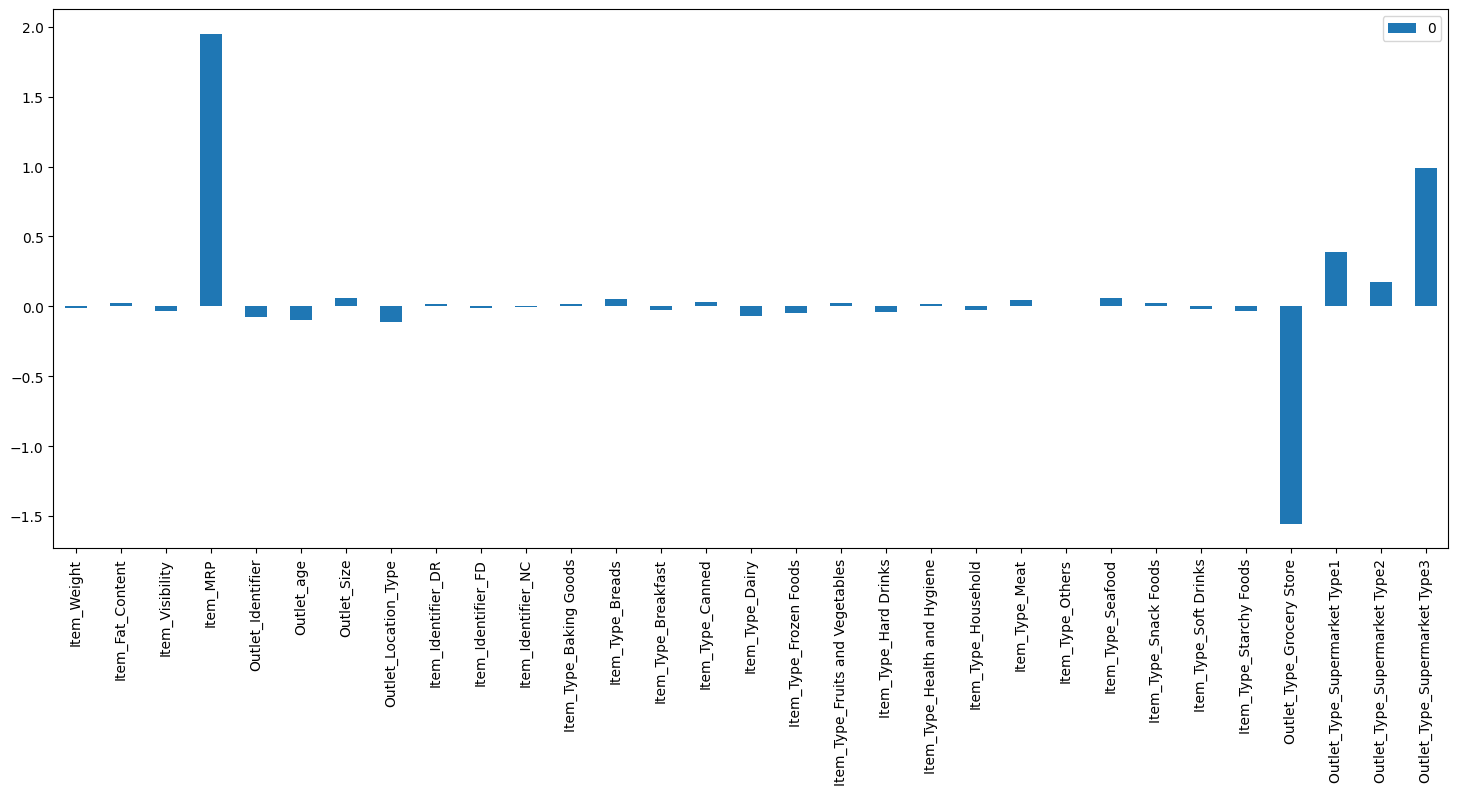

In [ ]:
feature_coef.plot.bar(figsize = (18,7))

**Predictions**

In [ ]:
xtest.values[20]

array([12.85764518,  0.        ,  0.05472372, 36.6874    , 27.        ,
       40.        ,  1.        ,  3.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [ ]:
print("Sales prediction for 20th sample-")
print(np.exp(model_A.predict([xtest.values[20]])))        #predicted value is log so use exponential function for antilog

Sales prediction for 20th sample-
[1319.23216243]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Real sales for 20th sample in test data-")
print(np.exp(ytest.values[20]))

Real sales for 20th sample in test data-
1058.6220000000005


In [ ]:
a = 95
b = np.log(a)
print(b)

4.553876891600541


In [ ]:
c = np.exp(b)
print(c)

95.0
